# Комп'ютерний практикум № 3 - 4.   Побудова композитних індикаторів 
Тема: Оцінка рівня гендерного розриву в економіці та політиці

Виконали: Драган Влада, Завальська Анастасія КІ-33

## Частина 1

In [ ]:
library(tidyverse)
library(mice)        
library(psych)      
library(FactoMineR)  
library(factoextra)  
library(naniar)

raw <- read_csv("raw_data_merged.csv")

summary(raw)
head(raw)
tail(raw)

Warning message:
"package 'naniar' was built under R version 4.5.2"
Rows: 750 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, code
dbl (8): row_id, year, Ratio_LFP_F_M, Wage_Gap, Women_Parliament, Women_Mini...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


     row_id        country              code                year     
 Min.   :  1.0   Length:750         Length:750         Min.   :2010  
 1st Qu.:188.2   Class :character   Class :character   1st Qu.:2013  
 Median :375.5   Mode  :character   Mode  :character   Median :2017  
 Mean   :375.5                                         Mean   :2017  
 3rd Qu.:562.8                                         3rd Qu.:2021  
 Max.   :750.0                                         Max.   :2024  
                                                                     
 Ratio_LFP_F_M      Wage_Gap       Women_Parliament Women_Ministers
 Min.   :21.11   Min.   :-57.224   Min.   : 1.969   Min.   : 0.00  
 1st Qu.:62.62   1st Qu.: -3.083   1st Qu.:17.420   1st Qu.:11.11  
 Median :73.63   Median :  6.642   Median :22.535   Median :21.40  
 Mean   :69.64   Mean   :  5.137   Mean   :26.310   Mean   :23.98  
 3rd Qu.:82.31   3rd Qu.: 14.213   3rd Qu.:35.714   3rd Qu.:34.80  
 Max.   :91.74   Max.   : 37.776

row_id,country,code,year,Ratio_LFP_F_M,Wage_Gap,Women_Parliament,Women_Ministers,Female_Management,Business_reg
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Argentina,ARG,2010,65.04760,-1.849,38.52140,20.0,32.139,1
2,Argentina,ARG,2011,64.81076,1.377,37.35409,NA,30.155,1
3,Argentina,ARG,2012,65.59693,-0.865,37.35409,17.6,32.343,1
4,Argentina,ARG,2013,65.39512,1.031,36.57588,NA,36.492,1
5,Argentina,ARG,2014,65.85193,-0.466,36.57588,17.6,38.637,1
6,Argentina,ARG,2015,66.45122,NA,NA,22.2,NA,1


row_id,country,code,year,Ratio_LFP_F_M,Wage_Gap,Women_Parliament,Women_Ministers,Female_Management,Business_reg
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
745,Zambia,ZMB,2019,77.64513,16.521,17.96407,32.258,29.950,1
746,Zambia,ZMB,2020,80.52275,4.254,16.76647,32.258,39.622,1
747,Zambia,ZMB,2021,81.62339,10.877,15.06024,NA,39.512,1
748,Zambia,ZMB,2022,82.65511,-10.207,15.06024,16.000,36.458,1
749,Zambia,ZMB,2023,82.84205,-3.364,14.97006,12.500,36.693,1
750,Zambia,ZMB,2024,82.77664,NA,14.97006,16.000,NA,NA


### Імпутація пропусків
Тут використаємо multiple imputation з предиктивним співставленням (pmm).

[1] "Ratio_LFP_F_M"     "Wage_Gap"          "Women_Parliament" 
[4] "Women_Ministers"   "Female_Management" "Business_reg"

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
                0               296                 7               204 
Female_Management      Business_reg 
              126                50

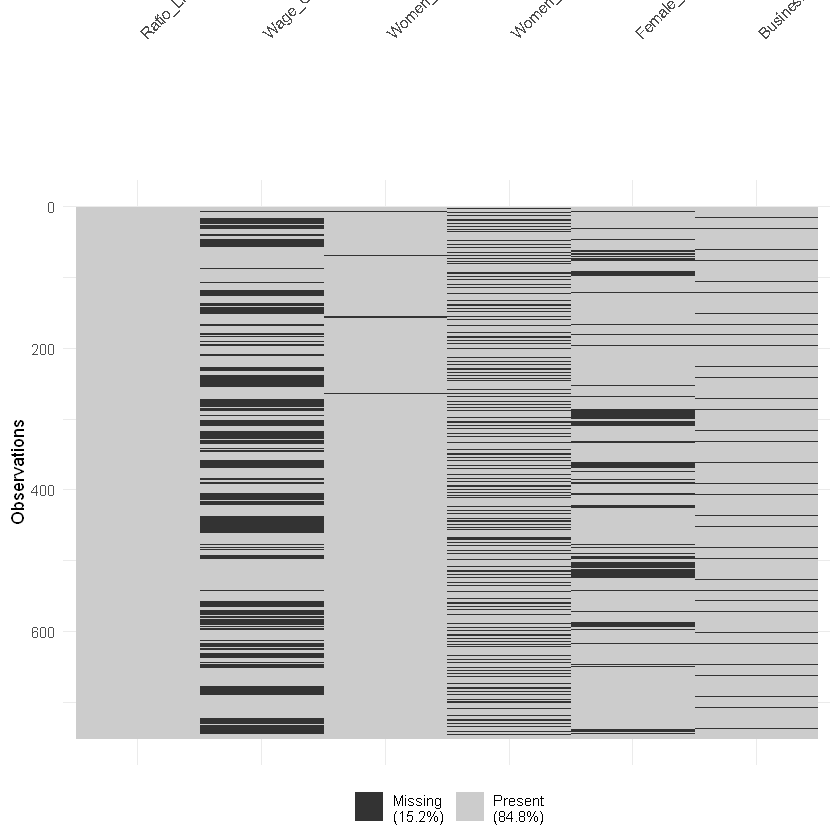

In [ ]:
id_vars <- c("row_id", "country", "code", "year")
indicator_vars <- setdiff(names(raw), id_vars)

indicator_vars

data_id  <- raw[, id_vars]
data_ind <- raw[, indicator_vars]

sapply(data_ind, function(x) sum(is.na(x)))


vis_miss(data_ind)


Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
      0.000000000       0.394666667       0.009333333       0.272000000 
Female_Management      Business_reg 
      0.168000000       0.066666667

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
               ""             "pmm"             "pmm"             "pmm" 
Female_Management      Business_reg 
            "pmm"             "pmm"


 iter imp variable
  1   1  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  1   2  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  1   3  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  1   4  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  1   5  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  2   1  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  2   2  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  2   3  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  2   4  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  2   5  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  3   1  Wage_Gap  Women_Parliament  Women_Ministers  Female_Management  Business_reg
  3   2  Wage_Gap  Women_Parliamen

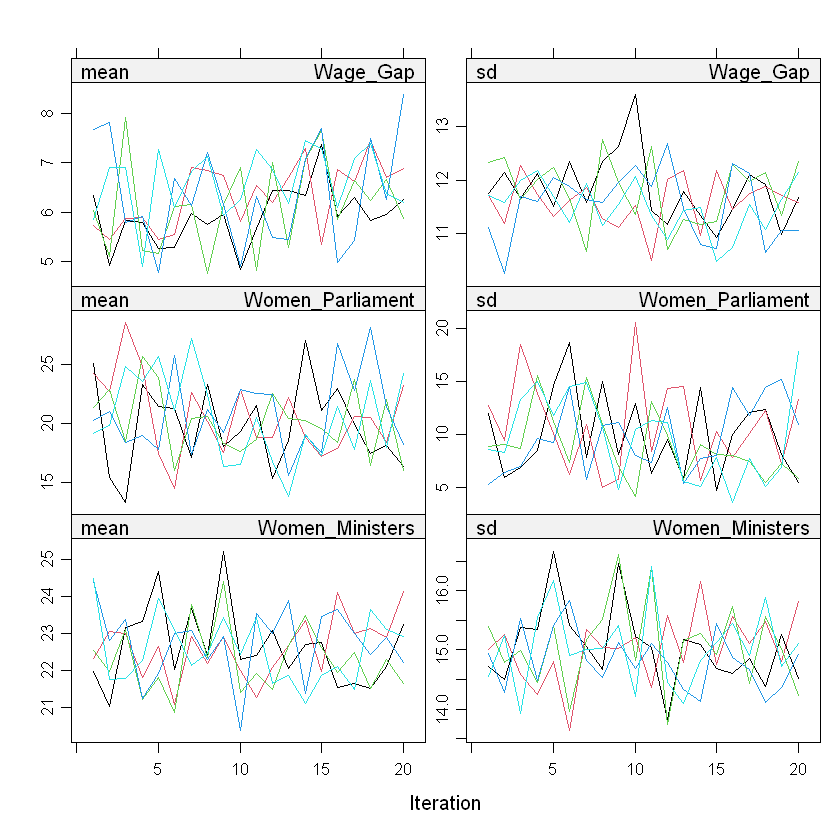

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
                0                 0                 0                 0 
Female_Management      Business_reg 
                0                 0

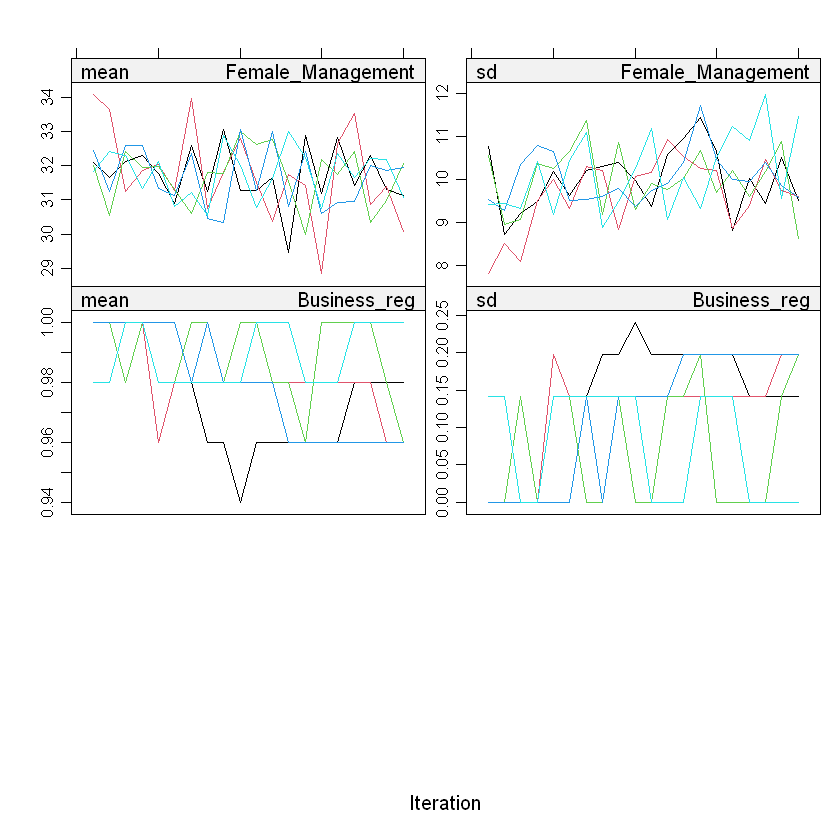

In [56]:
colMeans(is.na(data_ind))


ini  <- mice(data_ind, maxit = 0, printFlag = FALSE)
meth <- ini$method
meth

set.seed(123)
imp <- mice(data_ind,
            m        = 5,       
            method   = meth,
            maxit    = 20,
            printFlag = TRUE)

plot(imp)

data_ind_imp <- complete(imp, action = 1)

colSums(is.na(data_ind_imp))

data_imputed_full <- cbind(data_id, data_ind_imp)
write.csv(data_imputed_full,
          "imputed_data.csv",
          row.names = FALSE)

Trace plots показують, що multiple imputation стабільна та збіглася.
Усі імпутовані набори дають схожі оцінки, і жоден ланцюг не “вибухає”.
Це означає, що результати імпутації можна використовувати далі.

### Орієнтація показників

In [ ]:

direction <- c(
  Ratio_LFP_F_M     =  1,  # більша участь жінок у ринку праці = краще
  Wage_Gap          = -1,  # більша gender wage gap = гірше
  Women_Parliament  =  1,  # більше жінок у парламенті = краще
  Women_Ministers   =  1,  # більше жінок-міністрів = краще
  Female_Management =  1,  # більше жінок у менеджменті = краще
  Business_reg      =  1   # залежить від змісту змінної (0/1)
)

data_ind_oriented <- data_ind_imp

for (var in names(direction)) {
  if (direction[[var]] == -1) {
    data_ind_oriented[[var]] <- - data_ind_oriented[[var]]
  }
}

summary(data_ind_oriented)


 Ratio_LFP_F_M      Wage_Gap       Women_Parliament Women_Ministers
 Min.   :21.11   Min.   :-37.776   Min.   : 1.969   Min.   : 0.00  
 1st Qu.:62.62   1st Qu.:-14.370   1st Qu.:17.333   1st Qu.:11.18  
 Median :73.63   Median : -8.004   Median :22.525   Median :21.05  
 Mean   :69.64   Mean   : -5.578   Mean   :26.217   Mean   :23.78  
 3rd Qu.:82.31   3rd Qu.:  2.581   3rd Qu.:35.657   3rd Qu.:33.33  
 Max.   :91.74   Max.   : 57.224   Max.   :63.750   Max.   :66.67  
 Female_Management  Business_reg  
 Min.   : 3.483    Min.   :0.000  
 1st Qu.:26.362    1st Qu.:1.000  
 Median :33.515    Median :1.000  
 Mean   :32.241    Mean   :0.984  
 3rd Qu.:38.587    3rd Qu.:1.000  
 Max.   :63.299    Max.   :1.000  

### Багатовимірний аналіз

#### Викиди в даних

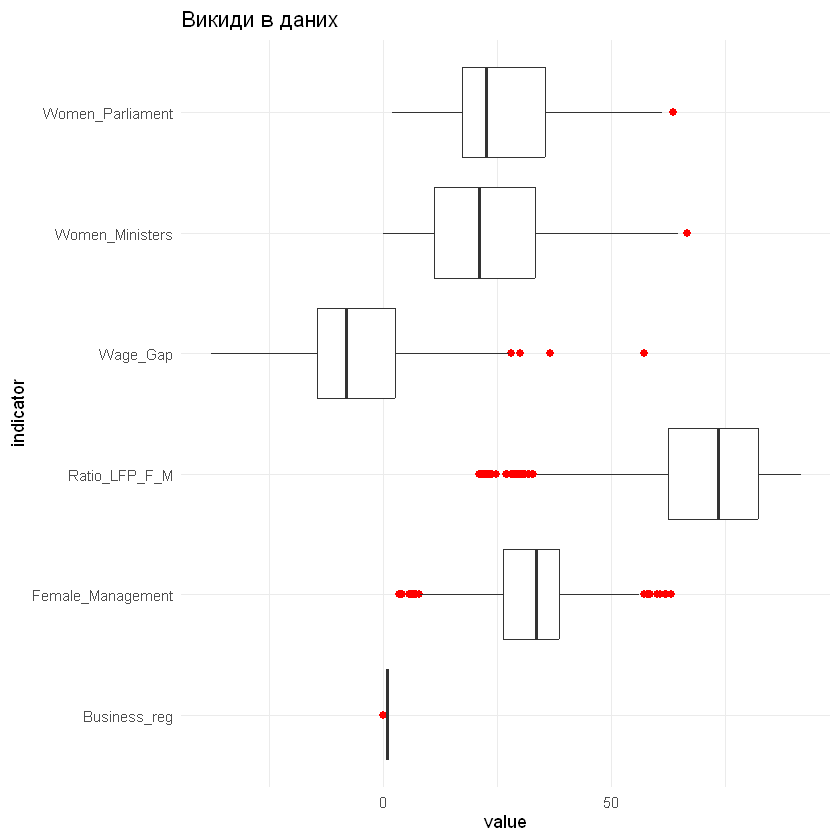

In [35]:
library(tidyverse)

data_ind_oriented %>%
  pivot_longer(cols = everything(),
               names_to = "indicator",
               values_to = "value") %>%
  ggplot(aes(x = indicator, y = value)) +
  geom_boxplot(outlier.color = "red", outlier.size = 2) +
  theme_minimal() +
  labs(title = "Викиди в даних") +
  coord_flip()


#### Кореляційна матриця

,Ratio_LFP_F_M,Wage_Gap,Women_Parliament,Women_Ministers,Female_Management,Business_reg
Ratio_LFP_F_M,1.00,-0.36,0.39,0.36,0.25,0.32
Wage_Gap,-0.36,1.00,-0.06,-0.06,0.24,0.14
Women_Parliament,0.39,-0.06,1.00,0.65,0.15,0.06
Women_Ministers,0.36,-0.06,0.65,1.00,0.26,0.14
Female_Management,0.25,0.24,0.15,0.26,1.00,0.35
Business_reg,0.32,0.14,0.06,0.14,0.35,1.00


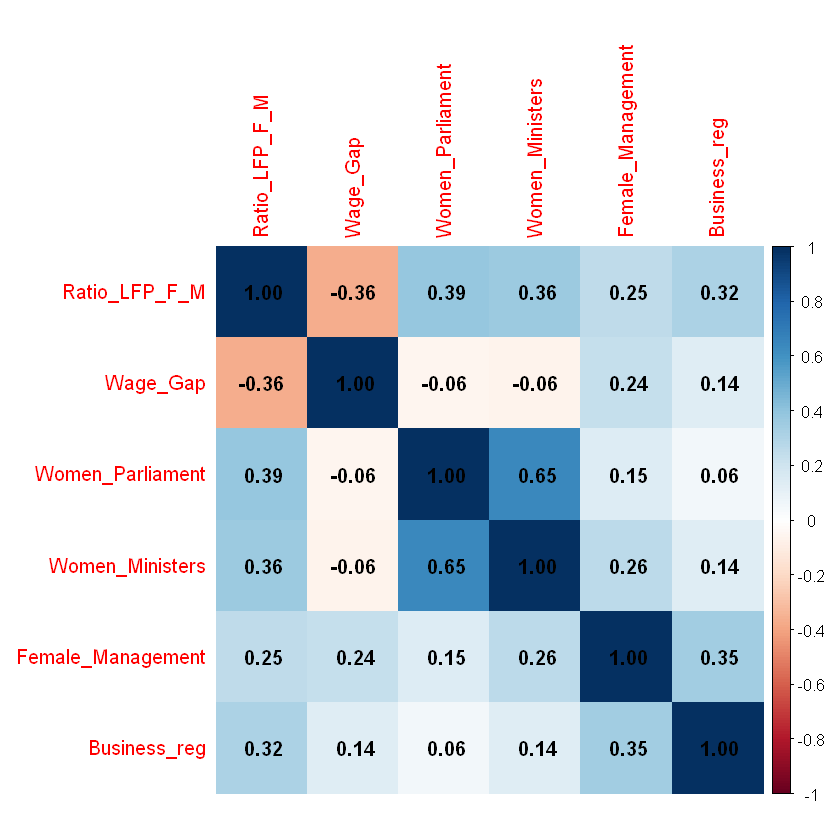

In [ ]:
cor_mat <- cor(data_ind_oriented, use = "pairwise.complete.obs")
round(cor_mat, 2)

corrplot::corrplot(cor_mat, method = "color", addCoef.col = "black")


####  PCA (Principal Components Analysis)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.4885 1.1863 1.0229 0.7838 0.64227 0.55141
Proportion of Variance 0.3693 0.2345 0.1744 0.1024 0.06875 0.05067
Cumulative Proportion  0.3693 0.6038 0.7782 0.8806 0.94933 1.00000

,PC1,PC2,PC3,PC4,PC5,PC6
Ratio_LFP_F_M,0.49872811,0.19797522,-0.43235741,-0.08501102,-0.5780736,0.4286574
Wage_Gap,-0.09748417,-0.66969238,0.44950248,0.20423239,-0.4307244,0.3357412
Women_Parliament,0.50179793,0.19059730,0.45213380,0.19497612,-0.3184753,-0.6066336
Women_Ministers,0.52941568,0.09997457,0.39246585,0.07143773,0.5534482,0.4942534
Female_Management,0.34588514,-0.51559554,-0.07549924,-0.73654071,0.1161619,-0.2298669
Business_reg,0.30008072,-0.44738900,-0.49685012,0.60452544,0.2430686,-0.1959623


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
"Ignoring empty aesthetic: `width`."


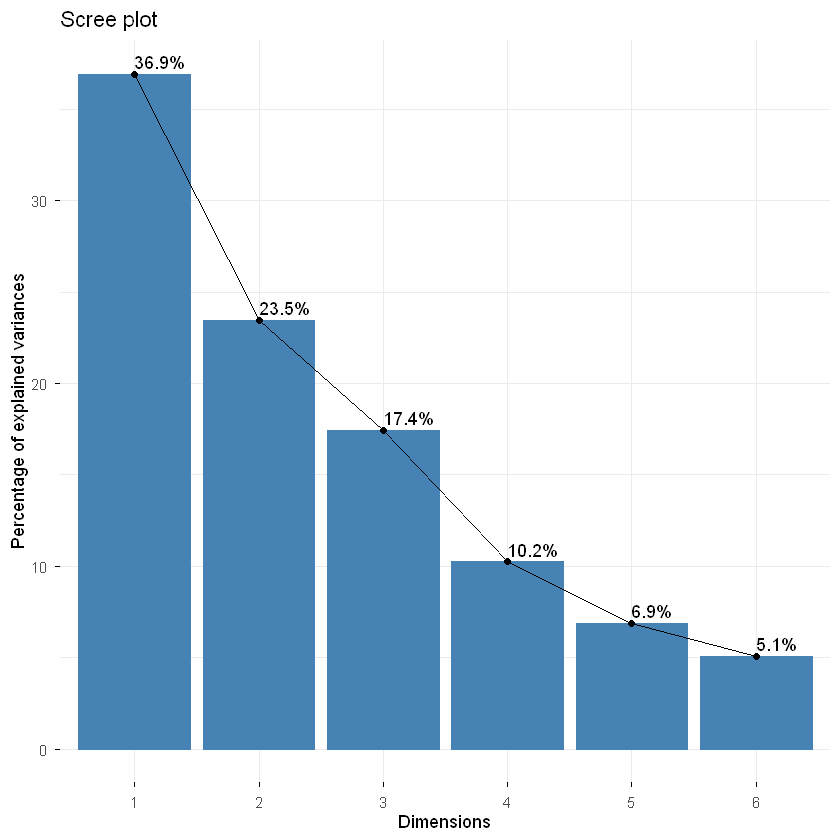

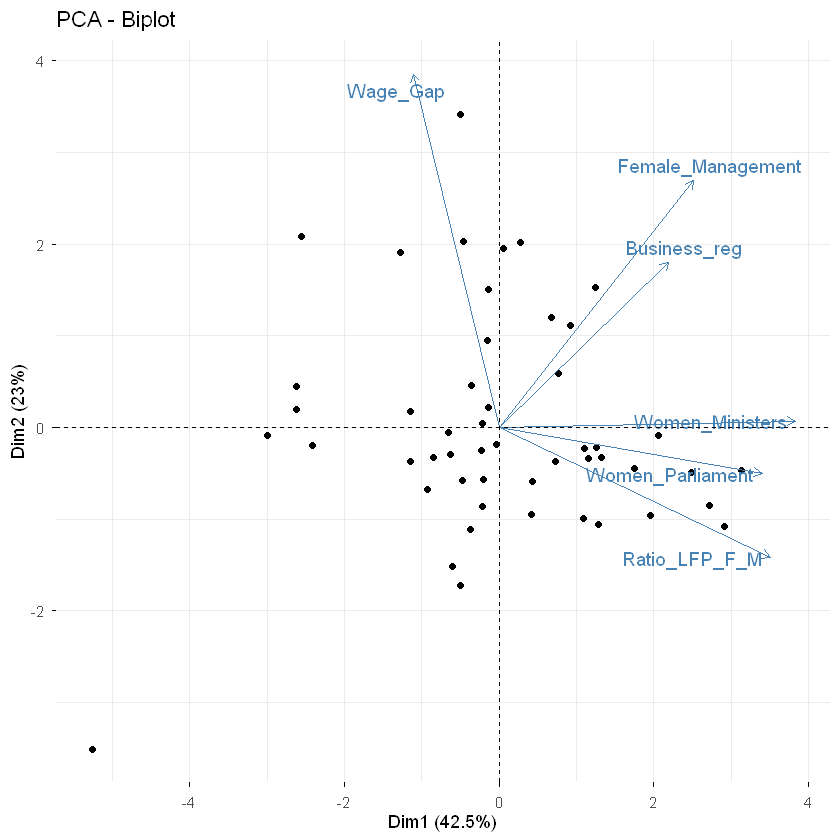

In [ ]:
pca_res <- prcomp(data_ind_oriented, scale. = TRUE)

summary(pca_res)        
pca_res$rotation       

fviz_eig(pca_res, addlabels = TRUE)


data_pca <- cbind(data_id, data_ind_oriented)

country_means <- data_pca |>
  group_by(country) |>
  summarise(across(all_of(indicator_vars), mean, na.rm = TRUE))

pca_res_country <- PCA(country_means[, indicator_vars], scale.unit = TRUE, graph = FALSE)

fviz_pca_biplot(pca_res_country,
                repel = TRUE,
                label = "var") 


### Нормалізація даних

In [ ]:
data_norm <- scale(data_ind_oriented) %>% as.data.frame()
summary(data_norm)

colMeans(data_norm)
apply(data_norm, 2, sd)


 Ratio_LFP_F_M        Wage_Gap       Women_Parliament  Women_Ministers  
 Min.   :-2.9237   Min.   :-2.6662   Min.   :-1.9708   Min.   :-1.5528  
 1st Qu.:-0.4225   1st Qu.:-0.7280   1st Qu.:-0.7220   1st Qu.:-0.8226  
 Median : 0.2407   Median :-0.2009   Median :-0.3001   Median :-0.1782  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7632   3rd Qu.: 0.6756   3rd Qu.: 0.7672   3rd Qu.: 0.6235  
 Max.   : 1.3318   Max.   : 5.2004   Max.   : 3.0504   Max.   : 2.8000  
 Female_Management  Business_reg    
 Min.   :-2.9529   Min.   :-7.8370  
 1st Qu.:-0.6036   1st Qu.: 0.1274  
 Median : 0.1309   Median : 0.1274  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6517   3rd Qu.: 0.1274  
 Max.   : 3.1891   Max.   : 0.1274  

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
     3.715546e-17      3.969047e-18     -6.596113e-17      8.185351e-17 
Female_Management      Business_reg 
    -2.101537e-16      1.132427e-16

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
                1                 1                 1                 1 
Female_Management      Business_reg 
                1                 1

### Побудова композитного індексу (ваги з PCA)

In [ ]:
pca_norm <- prcomp(data_norm, scale. = FALSE) 

loadings_PC1 <- pca_norm$rotation[, 1]
loadings_PC1

weights_PCA <- loadings_PC1 / sum(abs(loadings_PC1))
weights_PCA

CI_PCA <- as.matrix(data_norm) %*% weights_PCA
CI_PCA <- as.numeric(CI_PCA)

data_ci$CI_PCA <- CI_PCA

head(data_ci)


Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
       0.49872811       -0.09748417        0.50179793        0.52941568 
Female_Management      Business_reg 
       0.34588514        0.30008072

Ratio_LFP_F_M          Wage_Gap  Women_Parliament   Women_Ministers 
        0.2193762        -0.0428805         0.2207266         0.2328748 
Female_Management      Business_reg 
        0.1521450         0.1319969

row_id,country,code,year,CI_EW,CI_PCA
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Argentina,ARG,2010,0.2014198,0.09141899
2,Argentina,ARG,2011,0.4765549,0.56730588
3,Argentina,ARG,2012,0.1549178,0.04792769
4,Argentina,ARG,2013,0.2247628,0.15535177
5,Argentina,ARG,2014,0.2491431,0.13708189
6,Argentina,ARG,2015,0.2202528,0.07518906


row_id,country,code,year,CI_EW,CI_PCA,rank_EW,rank_PCA
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
586,Rwanda,RWA,2010,0.8020222,0.8273527,1,4
631,Sweden,SWE,2010,0.6236668,0.9081694,2,3
181,Finland,FIN,2010,0.6229889,1.1611395,3,1
316,Iceland,ISL,2010,0.5757621,1.0329091,4,2
511,Peru,PER,2010,0.4005683,0.5678825,5,7
541,Portugal,PRT,2010,0.2914079,0.3899078,6,8


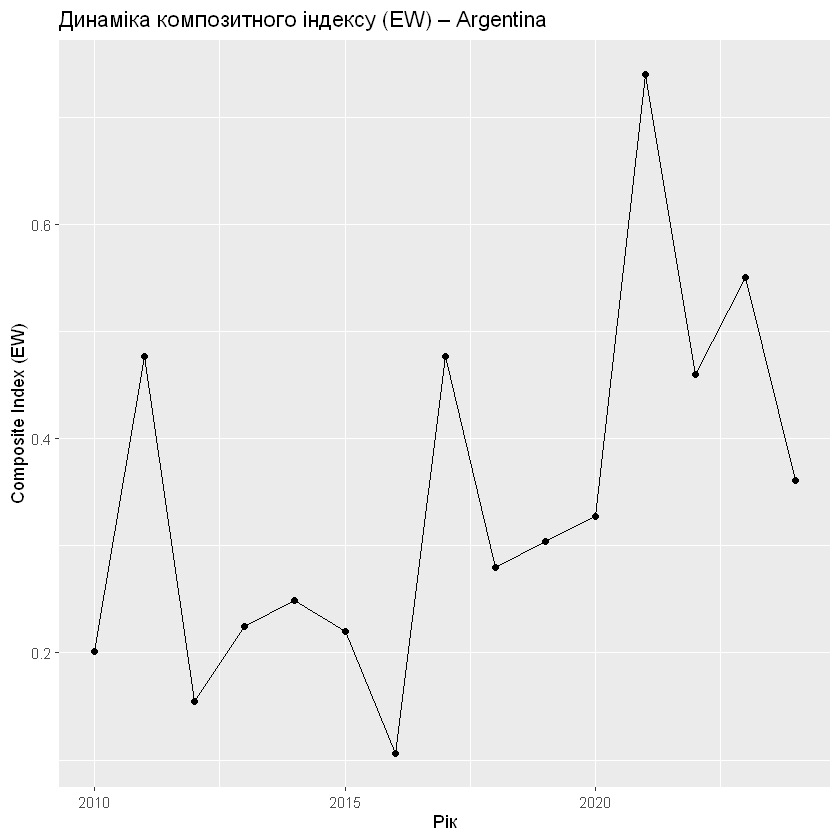

In [ ]:
ranked_by_year <- data_ci %>%
  group_by(year) %>%
  arrange(desc(CI_EW), .by_group = TRUE) %>%
  mutate(rank_EW = row_number(),
         rank_PCA = rank(-CI_PCA, ties.method = "min")) %>%
  ungroup()

head(ranked_by_year)

country_to_plot <- "Argentina"

ranked_by_year %>%
  filter(country == country_to_plot) %>%
  ggplot(aes(x = year)) +
  geom_line(aes(y = CI_EW)) +
  geom_point(aes(y = CI_EW)) +
  labs(title = paste("Динаміка композитного індексу (EW) –", country_to_plot),
       y = "Composite Index (EW)", x = "Рік")


In [ ]:
library(scales)

ranked_by_year <- ranked_by_year %>%
  group_by(year) %>%
  mutate(
    CI_EW_0_100  = rescale(CI_EW,  to = c(0, 100)),
    CI_PCA_0_100 = rescale(CI_PCA, to = c(0, 100))  
  ) %>%
  ungroup()

head(ranked_by_year)


row_id,country,code,year,CI_EW,CI_PCA,rank_EW,rank_PCA,CI_EW_0_100,CI_PCA_0_100
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
586,Rwanda,RWA,2010,0.8020222,0.8273527,1,4,100.00000,90.21288
631,Sweden,SWE,2010,0.6236668,0.9081694,2,3,94.79349,92.58254
181,Finland,FIN,2010,0.6229889,1.1611395,3,1,94.77370,100.00000
316,Iceland,ISL,2010,0.5757621,1.0329091,4,2,93.39506,96.24010
511,Peru,PER,2010,0.4005683,0.5678825,5,7,88.28084,82.60483
541,Portugal,PRT,2010,0.2914079,0.3899078,6,8,85.09425,77.38635


In [ ]:

year_to_plot <- 2022  
data_year <- ranked_by_year %>%
  filter(year == year_to_plot)

stats_idx <- summary(data_year$CI_EW_0_100)

cat("Загальна статистика індексу (0–100) для", year_to_plot, "року:\n")
cat("Min.  1st Qu.  Median  Mean  3rd Qu.  Max.\n")
cat(paste(round(stats_idx, 2), collapse = "  "), "\n")


Загальна статистика індексу (0–100) для 2022 року:
Min.  1st Qu.  Median  Mean  3rd Qu.  Max.
0  44.05  63.35  58.86  75.68  100 


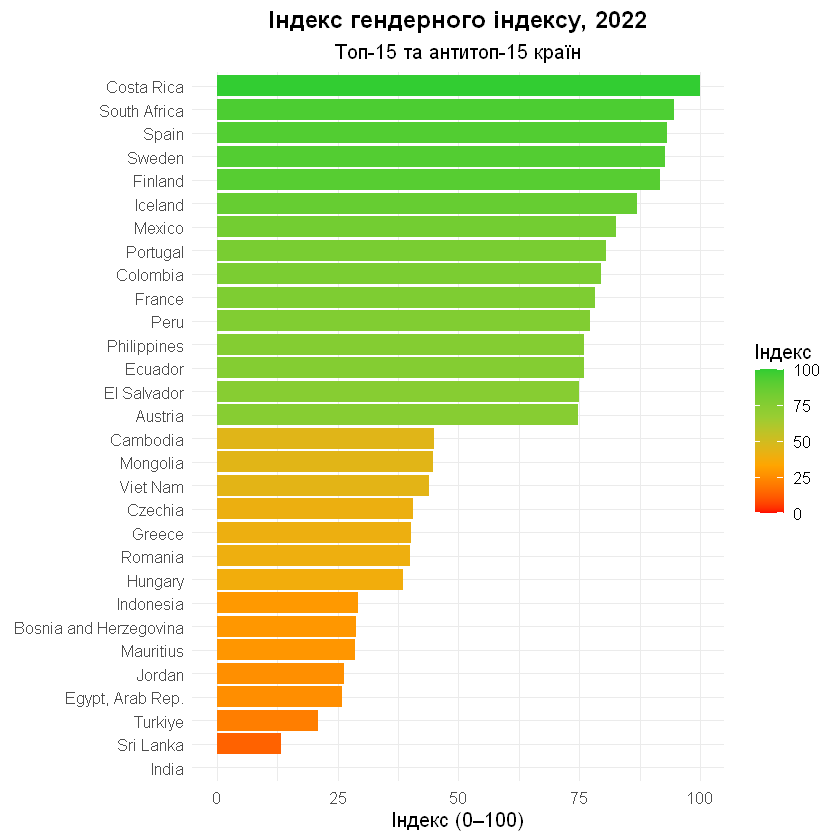

In [ ]:
top15 <- data_year %>%
  arrange(desc(CI_EW_0_100)) %>%
  slice_head(n = 15) %>%
  mutate(group = "Top-15")

bottom15 <- data_year %>%
  arrange(CI_EW_0_100) %>%
  slice_head(n = 15) %>%
  mutate(group = "Antitop-15")

top_bottom <- bind_rows(top15, bottom15)

top_bottom <- top_bottom %>%
  mutate(
    country = factor(country,
                     levels = top_bottom$country[order(CI_EW_0_100)])
  )

library(ggplot2)

ggplot(top_bottom,
       aes(x = CI_EW_0_100,
           y = country,
           fill = CI_EW_0_100)) +
  geom_col() +
  scale_fill_gradientn(
    colours = c("red", "orange", "yellowgreen", "limegreen"),
    name = "Індекс"
  ) +
  labs(
    title    = paste("Індекс гендерного індексу,", year_to_plot),
    subtitle = "Топ-15 та антитоп-15 країн",
    x        = "Індекс (0–100)",
    y        = NULL
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "right",
    plot.title      = element_text(face = "bold", hjust = 0.5),
    plot.subtitle   = element_text(hjust = 0.5)
  )
